In [74]:
import numpy as np
import scipy.integrate as evaluation_integral
import math
import matplotlib.pyplot as plot


In [75]:
n = int(input("Dimension = "))
# Define the lower limit & upper limit for the integrals
lower_limit = -2*math.pi
upper_limit = 2*math.pi

Dimension = 4


In [76]:
# Define a function that generates the base functions for the polynomial function
def base_function_generator(p):
 # Define a base function as a lambda function of x raised to the power p
    base_function = lambda x:x**p
    return base_function

In [77]:
# Create a list of base functions for the polynomial space up to degree n-1
b = []
for i in range(n):
    b.append(base_function_generator(i))


In [78]:
# Initialize the vector F, which contains the integrals of the product of each base func
F = np.zeros(n)
for i in range(n):
    F[i] = (evaluation_integral.quad(lambda x:(b[i](x)* (1/(1+math.exp(-x)))),lower_limit, upper_limit)[0])

In [79]:
K = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        K[i,j] = (evaluation_integral.quad(lambda x:(b[i](x)*b[j](x)),lower_limit, upper_limit)[0])

In [80]:
C = np.linalg.solve(K, F)


In [81]:
x = np.arange(lower_limit, upper_limit,0.01)
# Define the actual function to be approximated
y1=[]
for i in x:
    a=(1/(1+math.exp(-i)))
    
    y1.append(a)
 

In [82]:
print(y1[0])

0.0018639618896250283


In [83]:
l = len(C)
# Creates an array y2 with the same size as the x array and initializes all of its elemen
y2 = np.zeros_like(x)
for i in range(n):
    y2 = C[i]*x**i + y2

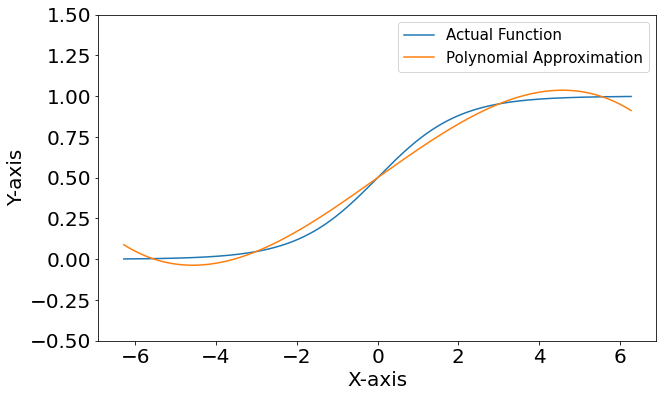

In [84]:
# Plot the actual function sin(x) and the polynomial approximation y2
plot.figure(figsize=(10,6))
plot.plot(x, y1, label="Actual Function")
plot.plot(x, y2, label="Polynomial Approximation")
plot.xlabel('X-axis', fontsize=20) # increase font size to 20
plot.ylabel('Y-axis', fontsize=20) # increase font size to 20
plot.tick_params(axis='both', which='major', labelsize=20) # increase font size to 20
Dimension = 4
# Add a legend to the plot
plot.legend(fontsize=15)
plot.ylim([-0.5,1.5])
plot.show()


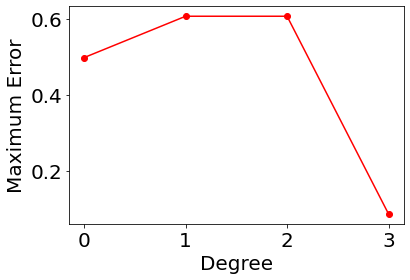

In [85]:
# plot the error for every degree polynomial
error = []
for i in range(n):
    y = np.zeros_like(x)
    for j in range(i+1):
        y += C[j]*x**j
    err = np.abs(y1-y)
    error.append(np.max(err))
 
plot.figure(figsize=(6,4))
plot.plot(range(n), error, 'ro-')
plot.xlabel('Degree', fontsize=20)
plot.ylabel('Maximum Error', fontsize=20)
plot.tick_params(axis='both', which='major', labelsize=20)
plot.show()
Dimension = 4
